In [ ]:
#for combined plots as seen in report

In [ ]:
import re
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from datetime import datetime
#from langdetect import detect
from wordcloud import WordCloud, STOPWORDS

import folium
from folium.plugins import HeatMap

from collections import Counter

In [ ]:
#import data
ny_listings = pd.read_csv('combined_train.csv')
sg_listings = pd.read_csv('SG_combined_train.csv')
combined_listings = pd.read_csv('NY_SG_combined_train.csv')

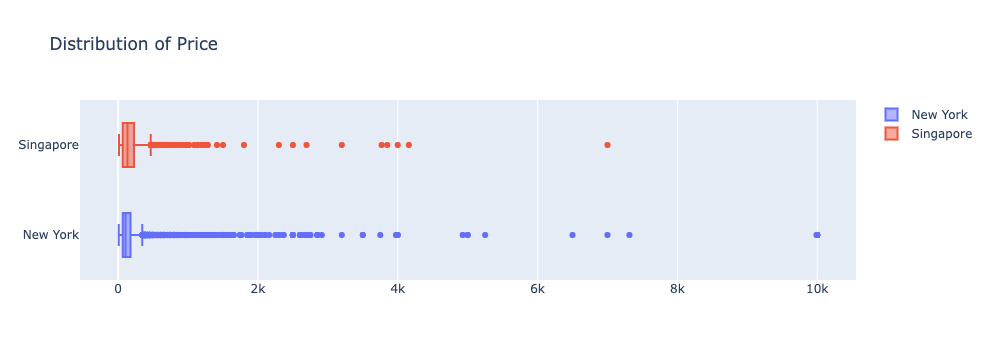

In [ ]:
#Distribution of price
y0 = ny_listings['price']
y1 = sg_listings['price']

fig = go.Figure()
fig.add_trace(go.Box(x=y0, quartilemethod="linear", name="New York"))
fig.add_trace(go.Box(x=y1, quartilemethod="linear", name="Singapore"))

fig.update_layout(title_text="Distribution of Price")
fig.show()

In [ ]:
print(y0.skew(), y1.skew())

19.591950312693324 10.190973565443464


In [ ]:
ny_listings_above_1000 = ny_listings.loc[ny_listings['price'] > 1000]
ny_listings_above_1000

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_str,name_lang,description_lang,host_months,dist_to_subway,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text
262,11226397,"Broadway, Time Square; Wyndham 45 at Manhattan",Take a bite out of the Big Apple at Wyndham Mi...,"Perfectly located at 45th St and 3rd Ave, righ...",2015-10-26,within a few hours,97.0,46.0,f,73.0,...,"""Hot water"", ""Iron"", ""Kitchen"", ""Cable TV"", ""F...",en,en,75,0.333867,NaN,broadway time square wyndham 45 at manhattan,take a bite out of the big apple at wyndham mi...,perfectly located at 45th st and 3rd ave right...,broadway time square wyndham 45 at manhattan t...
269,41459574,Your Private Home with Yard In Williamsburg,Entire two family home available in the heart ...,"Close to shops ,restaurants and transportation",2019-08-23,within an hour,100.0,100.0,t,4.0,...,"""Hot water"", ""Body soap"", ""Iron"", ""Shower gel""...",en,en,29,0.622958,this spot wa perfect for my getaway big enough...,your private home with yard in williamsburg,entire two family home available in the heart ...,close to shop restaurant and transportation,your private home with yard in williamsburg en...
369,38993556,"The Gregory Hotel, Tailored King","Herald Square gem dating back to 1903, steps f...",No Data,2019-09-27,a few days or more,0.0,NaN,f,5.0,...,"""Hot water"", ""Iron"", ""Lock on bedroom door"", ""...",en,en,28,0.271957,had a difficult time checking in since my name...,the gregory hotel tailored king,herald square gem dating back to 1903 step fro...,no data,the gregory hotel tailored king herald square ...
451,42475642,NYE 2020 Deluxe NYC Resort by MACY'S & Time Sq...,On an island famous for it's sights & sounds a...,There is a plethora of famous landmarks locate...,2016-12-31,No Data,NaN,NaN,f,1.0,...,"""Hot water"", ""Iron"", ""Pool"", ""Lock on bedroom ...",en,en,61,0.324622,NaN,nye 2020 deluxe nyc resort by macys time square,on an island famous for it sight sound and jus...,there is a plethora of famous landmark located...,nye 2020 deluxe nyc resort by macys time squar...
802,52656553,Peaceful and Quiet Student Room in New York,Take a break and unwind at this peaceful oasis.,No Data,2021-08-10,within a few hours,100.0,39.0,f,1.0,...,"""Cleaning products"", ""Iron"", ""Heating"", ""Carbo...",en,en,5,1.139907,NaN,peaceful and quiet student room in new york,take a break and unwind at this peaceful oasis,no data,peaceful and quiet student room in new york ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22446,50227515,Nice Solo Queen Bedroom with AC and heating,"Beautiful bedroom with queen sized bed, a high...",No Data,2021-06-05,No Data,NaN,NaN,f,0.0,...,"""Lock on bedroom door"", ""Carbon monoxide alarm...",en,en,7,0.296072,NaN,nice solo queen bedroom with ac and heating,beautiful bedroom with queen sized bed a high ...,no data,nice solo queen bedroom with ac and heating be...
22508,14490720,Amazing apartment in NYC,"Amazing spacious apartment, all Bills included...","1 block to Restaurants, Bars and shopping, 2 ...",2015-05-26,No Data,NaN,NaN,f,1.0,...,"""Free parking on premises"", ""Air conditioning""...",en,en,80,0.333711,NaN,amazing apartment in nyc,amazing spacious apartment all bill included w...,1 block to restaurant bar and shopping 2 block...,amazing apartment in nyc amazing spacious apar...
22618,47022274,Fantastic Designer Loft in the Heart of Tribeca,The elevator opens directly into this light-fl...,No Data,2012-06-12,No Data,NaN,NaN,f,1.0,...,"""Private fenced garden or backyard"", ""Hot wate...",en,en,115,0.088750,NaN,fantastic designer loft in the heart of tribeca,the elevator open directly into this lightfloo...,no data,fantastic designer loft in the heart of tribec...
23004,49010997,"Family Vacay! 4 Modern Units, Restaurant, Roof...","Located two 

In [ ]:
sg_listings_above_1000 = sg_listings.loc[sg_listings['price'] > 1000]
sg_listings_above_1000

,id,name,description,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_str,dist_to_subway,name_lang,description_lang,host_months,comments,processed_name,processed_description,processed_neighborhood_overview,combined_text
27,29549880,2-bedroom luxury penthouse + Jacuzzi + BBQ deck,This penthouse is located on the 20th floor. T...,No Data,2011-07-10,a few days or more,21.0,6.0,f,161.0,...,"""Indoor fireplace"", ""Hangers"", ""Washer"", ""Hair...",0.118722,en,en,126,NaN,2bedroom luxury penthouse jacuzzi bbq deck,this penthouse is located on the 20th floor th...,no data,2bedroom luxury penthouse jacuzzi bbq deck thi...
82,42932845,EXQUISITE 2BR SUITE W/D TERRACE@SENTOSA ISLAND,"Designed to offer a little more privacy, these...",Universal Studios Singapore is 1.5 Kms away fr...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Backyard"", ""Hangers"", ""Bed linens"", ""Coffee m...",1.721870,es,en,51,NaN,exquisite 2br suite wd terracesentosa island,designed to offer a little more privacy these ...,universal studio singapore is 15 km away from ...,exquisite 2br suite wd terracesentosa island d...
94,23849245,2 Bedroom Villa with Private Pool,My place is close to Resorts World Sentosa. Yo...,No Data,2017-03-19,No Data,NaN,0.0,f,6.0,...,"""Shampoo"", ""Essentials"", ""Hangers"", ""Long term...",1.349589,en,en,58,NaN,2 bedroom villa with private pool,my place is close to resort world sentosa youl...,no data,2 bedroom villa with private pool my place is ...
96,21462227,Private Room [Kampong Glam] - for 8 pax,Conceived with the fuss-free traveller in mind...,No Data,2017-09-19,within a day,100.0,0.0,f,6.0,...,"""Shampoo"", ""Breakfast"", ""Essentials"", ""Buildin...",0.260555,en,en,52,the host canceled this reservation 16 day befo...,private room kampong glam for 8 pax,conceived with the fussfree traveller in mind ...,no data,private room kampong glam for 8 pax conceived ...
116,45918725,EXQUISITE 3BR SUITE W/D TERRACE@SENTOSA ISLAND,Ultra-luxury resort style 3-bedroom space loca...,Universal Studios Singapore is 1.5 Kms away fr...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Sound system"", ""Cleaning before checkout"", ""B...",1.589942,es,en,51,NaN,exquisite 3br suite wd terracesentosa island,ultraluxury resort style 3bedroom space locate...,universal studio singapore is 15 km away from ...,exquisite 3br suite wd terracesentosa island u...
279,39404728,EXTRAVAGANT 3-BEDROOM APARTMENT@ANTHONY ROAD,The spacious three bedroom apartment provides ...,"With the finest shopping, dining and entertain...",2017-07-05,within a few hours,95.0,41.0,f,467.0,...,"""Indoor fireplace"", ""Hangers"", ""Bed linens"", ""...",0.450318,ru,en,54,NaN,extravagant 3bedroom apartmentanthony road,the spacious three bedroom apartment provides ...,with the finest shopping dining and entertainm...,extravagant 3bedroom apartmentanthony road the...
351,53854707,STAY AT THE 3BR LUXURY AT BUSTLING- ORCHARD RD,This premium 3 bedroom apartment is convenient...,The vicinity of the apartment is surrounded by...,2017-10-27,within a few hours,95.0,30.0,f,225.0,...,"""Cleaning before checkout"", ""Hangers"", ""Bed li...",0.630126,uk,en,51,NaN,stay at the 3br luxury at bustling orchard rd,this premium 3 bedroom apartment is convenient...,the vicinity of the apartment is surrounded by...,stay at the 3br luxury at bustling orchard rd ...
428,38137480,Perfectly Located 2 bedroom apt at Orchard,It is located in the popular and bustling shop...,"Conveniently located, this apartment is surrou...",2019-01-25,within a few hours,97.0,31.0,f,118.0,...,"""Hangers"", ""Coffee maker"", ""Kitchen"", ""Cooking...",0.639878,en,en,36,NaN,perfectly located 2 bedroom apt at orchard,it is located in the popular and bustling shop...,conveniently located this apartment is surroun...,perfectly located 2 bedroom apt at orchard it ...
640,29548473,2-bedroom luxury penthouse - 2 Jacuzzi's BBQ deck

In [ ]:
ny_listings = ny_listings[ny_listings["price"] <= 1000]
sg_listings = sg_listings[sg_listings["price"] <= 1000]
print(ny_listings['price'].skew(), sg_listings['price'].skew())

2.8905395280417614 2.0780495185965924


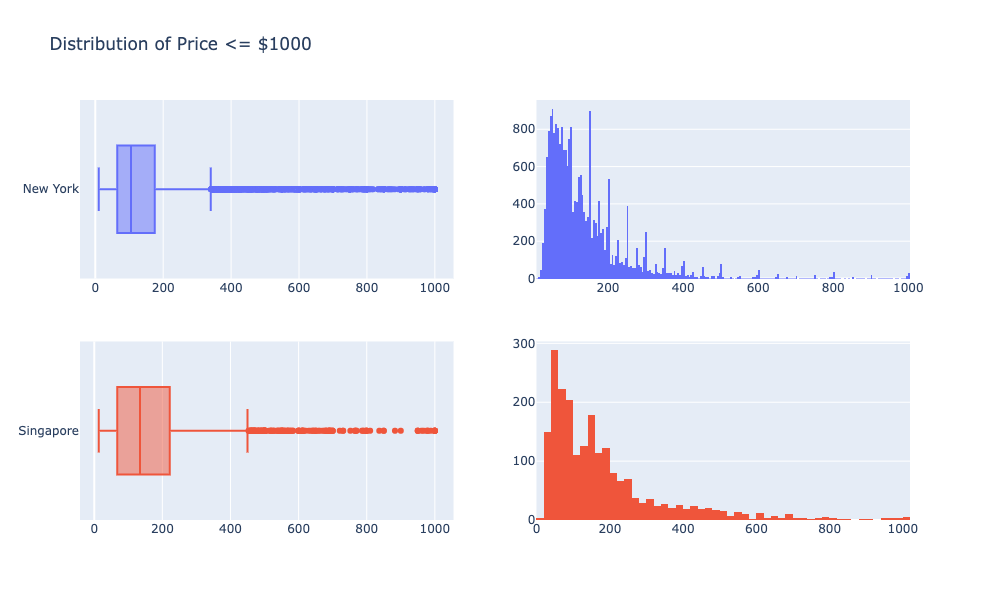

In [ ]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Box(x=ny_listings["price"], name="New York"), row=1, col=1)
fig.add_trace(go.Histogram(x=ny_listings["price"], name="New York", marker_color = '#636EFA'), row=1, col=2)
fig.add_trace(go.Box(x=sg_listings["price"], name="Singapore", marker_color = '#EF553B'), row=2, col=1)
fig.add_trace(go.Histogram(x=sg_listings["price"], name="Singapore", marker_color = '#EF553B'), row=2, col=2)

fig.update_layout(height=600, width=800, title_text="Distribution of Price <= $1000", showlegend = False)
fig.show()

In [ ]:
print("There are a total of", ny_listings["price"].count(), "NY listings and", sg_listings["price"].count(), "SG listings that are below $1000")

There are a total of 22921 NY listings and 2156 SG listings that are below $1000


In [ ]:
print("{:.2f}".format(ny_listings["price"].mean()))
print("{:.2f}".format(sg_listings["price"].mean()))

143.41
180.50


In [ ]:
df = ny_listings.groupby(["room_type"]).median().reset_index()
df = df[["room_type", "price"]]
df1 = sg_listings.groupby(["room_type"]).median().reset_index()
df1 = df1[["room_type", "price"]]

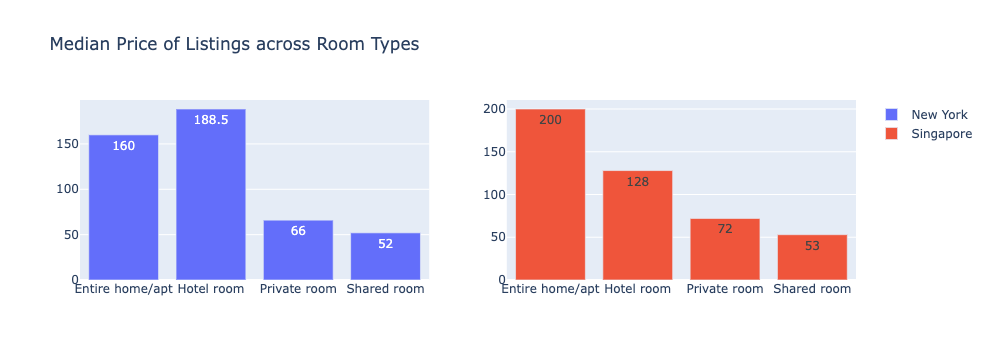

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(name="New York", x=df["room_type"], y=df["price"], text=df["price"], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(name="Singapore", x=df1["room_type"], y=df1["price"], text=df1["price"], textposition='auto'), row=1, col=2)
fig.update_layout(barmode='group', title_text="Median Price of Listings across Room Types")
fig.show()

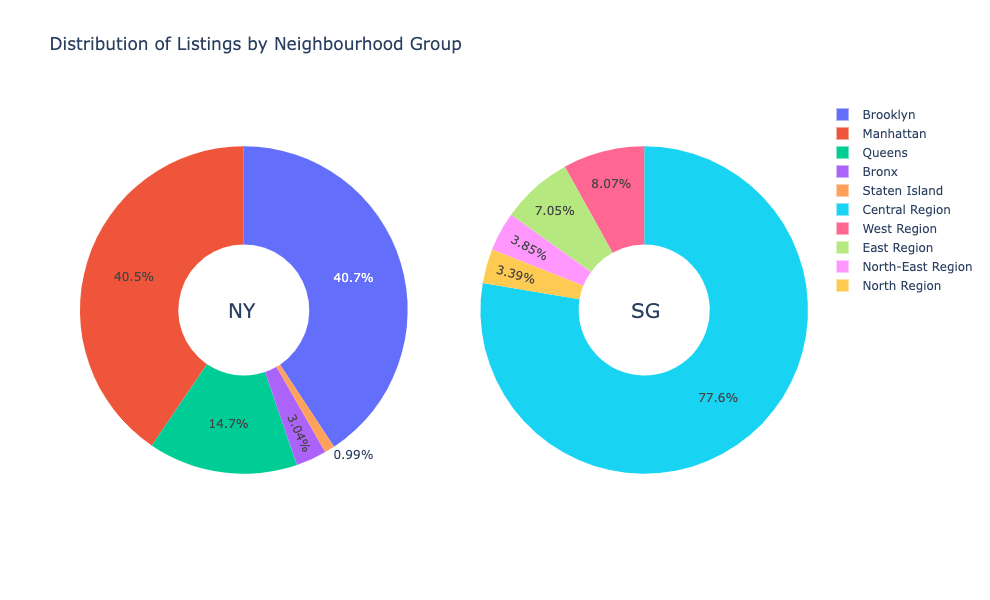

In [ ]:
ny_x = ny_listings["neighbourhood_group_cleansed"].value_counts()
sg_x = sg_listings["neighbourhood_group_cleansed"].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=ny_x.index, values=ny_x.values, name="New York"),
              1, 1)
fig.add_trace(go.Pie(labels=sg_x.index, values=sg_x.values, name="Singapore"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribution of Listings by Neighbourhood Group",
    annotations=[dict(text='NY', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='SG', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.update_layout(height = 600)
fig.show()

In [ ]:
df2 = ny_listings.groupby(["neighbourhood_group_cleansed"]).median().reset_index()
df2 = df2[["neighbourhood_group_cleansed", "price"]]
df3 = sg_listings.groupby(["neighbourhood_group_cleansed"]).median().reset_index()
df3 = df3[["neighbourhood_group_cleansed", "price"]]

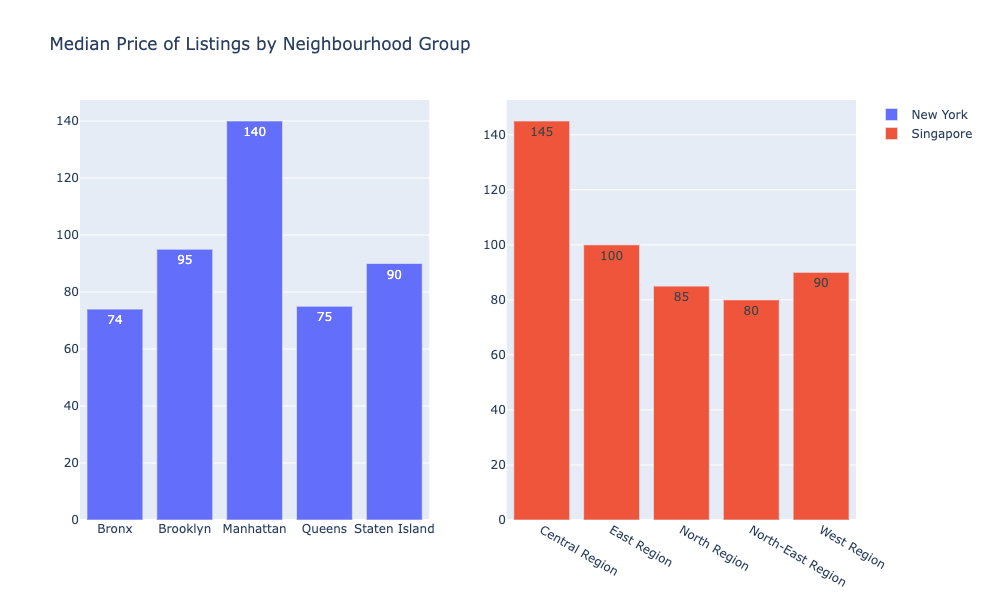

In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(name="New York", x=df2["neighbourhood_group_cleansed"], y=df2["price"], text=df2["price"], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(name="Singapore", x=df3["neighbourhood_group_cleansed"], y=df3["price"], text=df3["price"], textposition='auto'), row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Median Price of Listings by Neighbourhood Group")
fig.show()

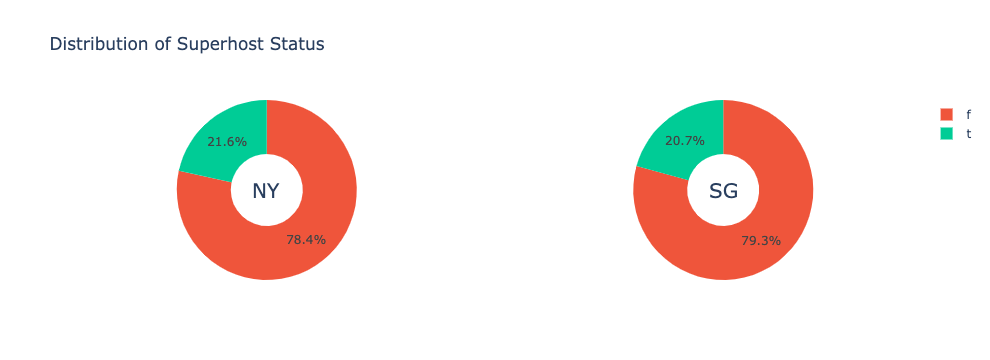

In [ ]:
ny_sh = ny_listings["host_is_superhost"].value_counts()
sg_sh = sg_listings["host_is_superhost"].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=ny_sh.index, values=ny_sh.values, name="New York", 
                     marker_colors=["#EF553B", "#00CC96"]),
              1, 1)
fig.add_trace(go.Pie(labels=sg_sh.index, values=sg_sh.values, name="Singapore", 
                     marker_colors=["#EF553B", "#00CC96"]),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Distribution of Superhost Status",
    annotations=[dict(text='NY', x=0.205, y=0.5, font_size=20, showarrow=False),
                 dict(text='SG', x=0.795, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
df4 = ny_listings.groupby(["host_is_superhost"]).median().reset_index()
df4 = df4[["host_is_superhost", "price"]]
df5 = sg_listings.groupby(["host_is_superhost"]).median().reset_index()
df5 = df5[["host_is_superhost", "price"]]

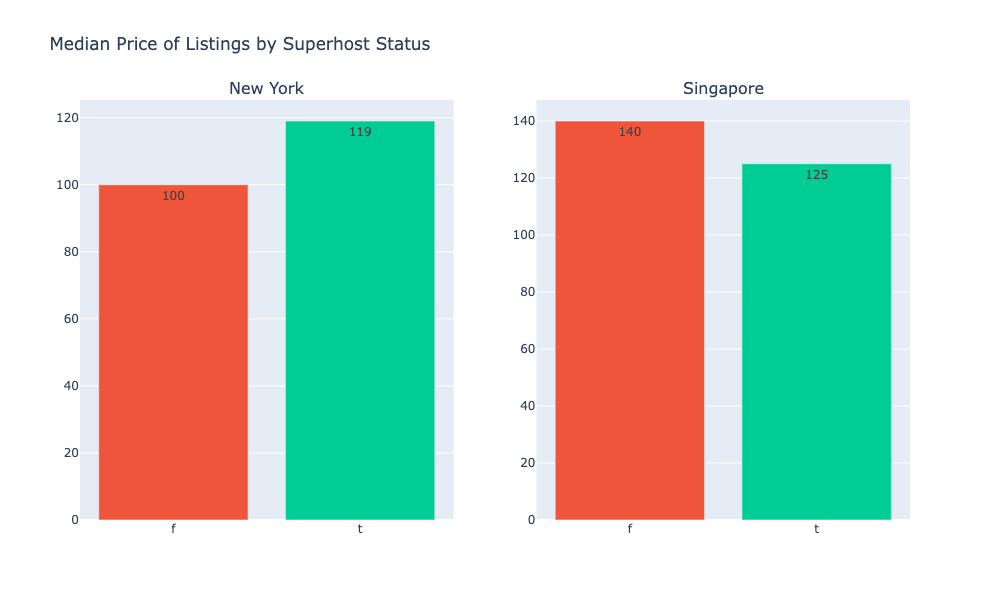

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("New York","Singapore"))

fig.add_trace(go.Bar(name="Left: New York", x=df4["host_is_superhost"], y=df4["price"], text=df4["price"], textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(name="Right: Singapore", x=df5["host_is_superhost"], y=df5["price"], text=df5["price"], textposition='auto'), row=1, col=2)
fig.update_traces(marker_color=["#EF553B", "#00CC96"])
fig.update_layout(height=600, width=800, title_text="Median Price of Listings by Superhost Status", showlegend=False)
fig.show()

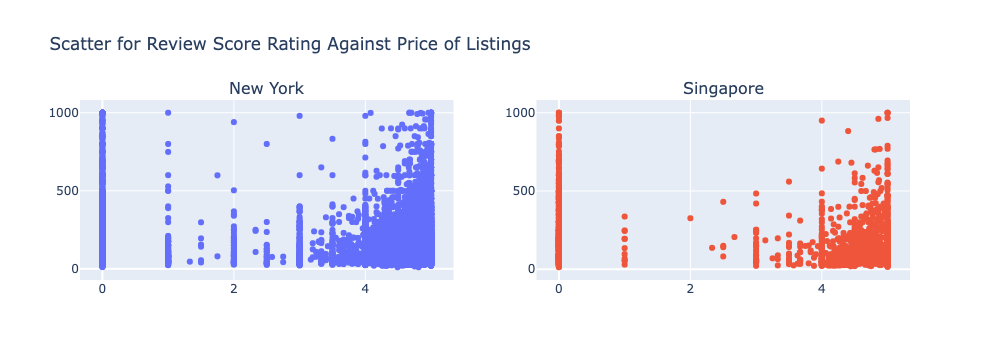

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("New York","Singapore"))

fig.add_trace(go.Scatter(x=ny_listings["review_scores_rating"], y=ny_listings["price"], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=sg_listings["review_scores_rating"], y=sg_listings["price"], mode='markers'), row=1, col=2)

fig.update_layout(title_text="Scatter for Review Score Rating Against Price of Listings", showlegend=False)
#px.scatter(ny_listings, x="review_scores_rating", y="price", title="Scatter for Reivew Score Rating Against Price of Listings")

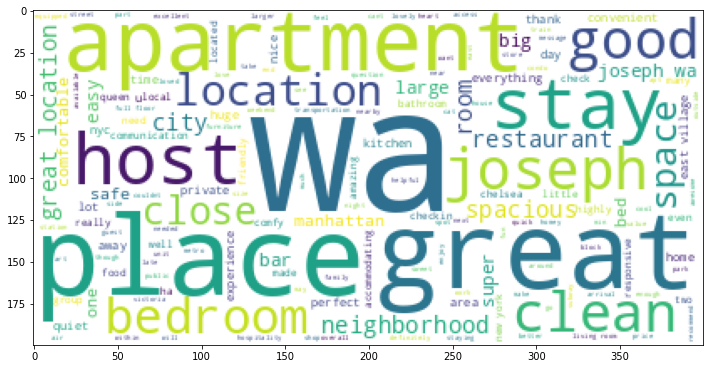

In [ ]:
text_plot = str(combined_listings["combined_text"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text_plot)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>